In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\Difdoug\Difdoug_AL_20.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.113880,0.042485,1.97890,1.83630,2.88660,2.46960,0.21541,3.09000,0.78343,0.51035,0.03043,0.100660
1,0.029389,0.206580,0.48861,1.43430,3.12990,1.27780,1.42850,0.14333,1.19480,2.13180,0.98473,3.844500
2,-1.115400,0.217560,1.61050,1.33710,3.76820,1.21000,3.99630,2.21730,3.90290,1.51440,2.43890,0.633580
3,-0.539160,-0.061874,0.36486,0.33278,0.19027,0.56716,1.66010,2.35270,0.66126,3.13510,3.93810,3.734600
4,-0.268400,-1.006000,2.88220,1.56160,3.20140,3.37740,1.52260,0.98475,3.10940,3.65640,3.91720,0.947060
...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.867100,-4.729200,3.72580,3.70480,NaN,NaN,NaN,NaN,NaN,0.15740,0.46504,NaN
396,0.264630,-6.107600,3.90540,1.33770,1.41870,1.68610,1.09510,3.79360,0.12790,0.54249,3.36580,3.755600
397,-3.479100,-1.993300,1.32480,1.77210,2.55090,1.47010,0.92540,1.84110,3.47730,0.95496,1.52630,2.123800
398,NaN,-0.411470,NaN,0.39655,2.99900,NaN,NaN,0.27800,NaN,3.43740,NaN,0.087212


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	27
float64		column 2	39
float64		column 3	92
float64		column 4	53
float64		column 5	65
float64		column 6	104
float64		column 7	91
float64		column 8	65
float64		column 9	78
float64		column 10	131
float64		column 11	92
float64		column 12	105


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
count,373.000000,361.000000,308.000000,347.000000,335.000000,296.000000,309.000000,335.000000,322.000000,269.000000,308.000000,295.000000
mean,-0.147821,0.071489,2.024691,1.893782,1.916804,1.967336,2.068730,1.975795,1.978736,2.035683,1.964750,1.982009
std,2.590592,2.746853,1.131807,1.135720,1.156794,1.133385,1.156550,1.140473,1.179980,1.159527,1.147190,1.202352
min,-7.771000,-6.800500,0.010405,0.005376,0.000530,0.018503,0.037802,0.007321,0.007019,0.067105,0.006786,0.001972
25%,-0.737350,-0.824930,1.119050,0.952680,0.877600,1.049175,1.072300,1.000225,0.959895,1.039400,0.940153,0.956090
50%,-0.104000,0.039315,2.086550,1.769100,1.884600,1.980650,2.120400,1.988600,2.121850,2.069800,1.883250,1.926100
75%,0.729830,0.906360,2.938525,2.795300,2.934350,2.904750,3.032200,2.984800,2.990525,3.059700,2.938725,3.042500
max,8.409300,6.777100,3.976400,3.993400,3.971200,3.992300,3.996300,3.994400,3.978100,3.984300,3.967600,3.996000


<AxesSubplot:>

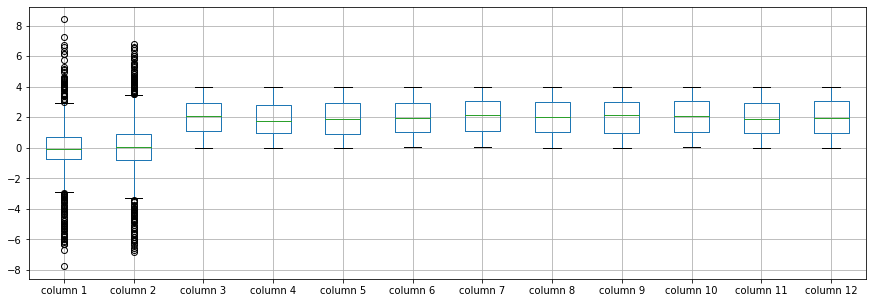

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1    -0.147821
column 2     0.071489
column 3     2.024691
column 4     1.893782
column 5     1.916804
column 6     1.967336
column 7     2.068730
column 8     1.975795
column 9     1.978736
column 10    2.035683
column 11    1.964750
column 12    1.982009
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
column 1,1.000000,0.059707,-0.038489,-0.068446,-0.032483,-0.009519,0.024040,0.040245,0.025536,0.001514,0.018428,-0.005646
column 2,0.059707,1.000000,0.010476,0.001002,-0.108314,-0.024379,0.018078,-0.047341,0.014631,-0.017050,-0.047821,0.060357
column 3,-0.038489,0.010476,1.000000,0.003521,-0.119266,-0.062714,0.008273,0.033616,0.134686,-0.064071,-0.068294,-0.018728
column 4,-0.068446,0.001002,0.003521,1.000000,0.002133,0.097399,0.048405,0.092148,0.000702,0.075743,-0.039505,-0.057626
column 5,-0.032483,-0.108314,-0.119266,0.002133,1.000000,0.081164,0.011678,-0.031934,-0.035012,0.058267,0.023900,-0.046210
column 6,-0.009519,-0.024379,-0.062714,0.097399,0.081164,1.000000,0.078975,0.060499,-0.019200,-0.041148,0.014624,-0.085297
column 7,0.024040,0.018078,0.008273,0.048405,0.011678,0.078975,1.000000,-0.022629,0.074421,-0.015669,0.016696,-0.092144
column 8,0.040245,-0.047341,0.033616,0.092148,-0.031934,0.060499,-0.022629,1.000000,0.013824,-0.176882,-0.034201,0.012702
column 9,0.025536,0.014631,0.134686,0.000702,-0.035012,-0.019200,0.074421,0.013824,1.000000,0.028076,0.008550,0.009388
column 10,0.001514,-0.017050,-0.064071,0.075743,0.058267,-0.041148,-0.015669,-0.176882,0.028076,1.000000,0.047159,0.025528


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [12,12+43,12+43+43,12+43+43+43,12+43+43+43+43,12+43+43+43+43+43,12+43+43+43+43+43+43,12+43+43+43+43+43,12+43+43+43+43,12+43+43+43,12+43+43,12+43,12], vae_layer = False, seed = 43)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [12]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 22.44324020385742
Epoch: 1 , loss: 22.374279556274413
Epoch: 2 , loss: 22.258563842773437
Epoch: 3 , loss: 22.12408790588379
Epoch: 4 , loss: 21.29979232788086
Epoch: 5 , loss: 19.078471450805665
Epoch: 6 , loss: 18.721719665527345
Epoch: 7 , loss: 18.323923873901368
Epoch: 8 , loss: 18.02184585571289
Epoch: 9 , loss: 17.874079513549805
Epoch: 10 , loss: 17.69003967285156
Epoch: 11 , loss: 17.53458190917969
Epoch: 12 , loss: 17.297488136291506
Epoch: 13 , loss: 17.07247142791748
Epoch: 14 , loss: 17.031347351074217
Epoch: 15 , loss: 16.69394775390625
Epoch: 16 , loss: 16.796233978271484
Epoch: 17 , loss: 16.738738555908203
Epoch: 18 , loss: 16.388272399902345
Epoch: 19 , loss: 16.31713237762451
Epoch: 20 , loss: 16.47012592315674
Epoch: 21 , loss: 16.355528411865233
Epoch: 22 , loss: 16.184477233886717
Epoch: 23 , loss: 16.434631576538084
Epoch: 24 , loss: 15.950503311157227
Epoch: 25 , loss: 16.025881

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(400, 12)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1    -0.705950
column 2     0.083515
column 3     1.058100
column 4     2.136200
column 5     1.651622
column 6     2.245800
column 7     1.750534
column 8     1.679423
column 9     1.943500
column 10    1.726553
column 11    2.470700
column 12    1.688521
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\Difdoug.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.000000,0.0,0.000000,0.000000,0.223718,0.736818,-0.486233,-2.171973,0.027648,0.000000,0.000000,-1.738895
396,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
397,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
398,-7.423130,0.0,-0.671062,0.000000,0.000000,-1.659179,-1.143067,0.000000,0.794238,0.000000,-0.016054,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(48.32301564819773, 163.27447192538312)

In [17]:
NRMS=numerator/denominator
NRMS


0.2959618553859508

In [18]:
new_df.iloc[66,:]

column 1     0.82272
column 2     0.26776
column 3     0.40343
column 4     1.18720
column 5     3.95660
column 6     2.58300
column 7     2.83060
column 8     3.07420
column 9     1.53810
column 10    0.24620
column 11    0.85334
column 12    3.60440
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,column 11,column 12
0,0.113880,0.042485,1.978900,1.836300,2.886600,2.469600,0.215410,3.090000,0.783430,0.510350,0.030430,0.100660
1,0.029389,0.206580,0.488610,1.434300,3.129900,1.277800,1.428500,0.143330,1.194800,2.131800,0.984730,3.844500
2,-1.115400,0.217560,1.610500,1.337100,3.768200,1.210000,3.996300,2.217300,3.902900,1.514400,2.438900,0.633580
3,-0.539160,-0.061874,0.364860,0.332780,0.190270,0.567160,1.660100,2.352700,0.661260,3.135100,3.938100,3.734600
4,-0.268400,-1.006000,2.882200,1.561600,3.201400,3.377400,1.522600,0.984750,3.109400,3.656400,3.917200,0.947060
...,...,...,...,...,...,...,...,...,...,...,...,...
395,-1.867100,-4.729200,3.725800,3.704800,1.106408,1.090878,1.141567,1.122027,1.112648,0.157400,0.465040,1.112505
396,0.264630,-6.107600,3.905400,1.337700,1.418700,1.686100,1.095100,3.793600,0.127900,0.542490,3.365800,3.755600
397,-3.479100,-1.993300,1.324800,1.772100,2.550900,1.470100,0.925400,1.841100,3.477300,0.954960,1.526300,2.123800
398,-0.130130,-0.411470,1.823738,0.396550,2.999000,1.750921,1.808533,0.278000,1.784828,3.437400,1.800146,0.087212


In [20]:
imputations[-1].to_excel("Difdoug_AL_20(imp).xlsx", index=False, header=False)